In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw04.ipynb")

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Homework 04: Visualizations and Functions

## Textbook References

* [Chapter 7](https://inferentialthinking.com/chapters/07/Visualization.html)
* [Sections 8.0 and 8.1](https://inferentialthinking.com/chapters/08/Functions_and_Tables.html)

---

## Assignment Reminders

- 🚨 Make sure to run the code cell at the top of this notebook that starts with `# Initialize Otter` to load the auto-grader.
- Your Tasks are categorized as auto-graded (📍) and manually graded (📍🔎).
    - For all the auto-graded tasks:
        - Replace the `...` in the provided code cell with your own code.
        - Run the `grader.check` code cell to run some tests on your code.
        - Keep in mind that for homework and project assignments, sometimes there are hidden tests that you will not be able to see the results of that we use for scoring the correctness of your response. **Passing the auto-grader does not guarantee that your answer is correct.**
    - For all the manually graded tasks:
        - You might need to provide your own response to the provided prompt. Do so by replacing the template text "_Type your answer here, replacing this text._" with your own words.
        - You might need to produce a graphic or something else using code. Do so by replacing the `...` in the code cell to generate the image, table, etc.
        - In either case, review the rubric on the associated <a href="https://ccsf.instructure.com" target="_blank">Canvas</a> Assignment page to understand the scoring criteria.
- Throughout this assignment and all future ones, please be sure to not re-assign variables throughout the notebook! _For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!_
- You may [submit](#Submit-Your-Assignment-to-Canvas) this assignment as many times as you want before the deadline. Your instructor will score the last version you submit once the deadline has passed.
- We encourage you to discuss this assignment with others but make sure to write and submit your own code. Refer to the syllabus to learn more about how to learn cooperatively.

---

## Configure the Notebook

Run the following cell to configure this Notebook.

In [2]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---

## Unemployment


The [Federal Reserve Bank of St. Louis](https://fred.stlouisfed.org/categories/33509) publishes data about jobs in the US.  Below, we've loaded data on unemployment in the United States. There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate:

1. Among people who are able to work and are looking for a full-time job, the percentage who can't find a job.  This is called the Non-Employment Index, or NEI.
2. Among people who are able to work and are looking for a full-time job, the percentage who can't find any job *or* are only working at a part-time job.  The latter group is called "Part-Time for Economic Reasons", so the acronym for this index is NEI+PTER.  (Economists are great at marketing.)

The data that you will use in this assignment contains [quarterly average NEI percentages from 1994 until 2024](https://fred.stlouisfed.org/series/NEIM156SFRBRIC) and [quarterly average NEI+PTER percentages from 1994 until 2024](https://fred.stlouisfed.org/series/NEIPTERM156SFRBRIC)

In a previous assignment, you created a table called `unemployment` that contained recent NEI and PTER values. Run the following code cell (which you are not responsible for understanding) to load that data here.

In [3]:
from datetime import datetime, date

def update_date_format(date_string):
    try:
        return datetime.strptime(date_string, '%Y-%m-%d').date()
    except ValueError:
        return None

unemployment = Table.read_table('unemployment.csv')

# Check if the 'DATE' column contains strings, then convert to datetime.date
if not isinstance(unemployment.column('DATE').item(0), date):
    unemployment = unemployment.with_column(
        'DATE', unemployment.apply(update_date_format, 'DATE')
    )

unemployment

DATE,NEI,NEI+PTER,PTER
1994-01-01,9.82912,10.9749,1.14582
1994-04-01,9.42543,10.6306,1.20512
1994-07-01,9.22842,10.359,1.13059
1994-10-01,8.98376,10.1199,1.13617
1995-01-01,8.88245,10.0086,1.12611
1995-04-01,8.97931,10.0942,1.1149
1995-07-01,8.96056,10.1052,1.14463
1995-10-01,8.95893,10.0813,1.12241
1996-01-01,8.90291,9.97698,1.07407
1996-04-01,8.80475,9.88223,1.07748


---

### Task 01 📍🔎

<!-- BEGIN QUESTION -->

Using the `unemployment` table, create an overlaid line plot showing two lines for NEI and PTER unemployment percentages over the dates. The dates should be on the horizontal axes and the percentages should be on the vertical axes.

**Note:** Our code below will format the graph for you so that the x-axis shows the year portion of the date for every 3 years starting from 1994.

_Points:_ 2

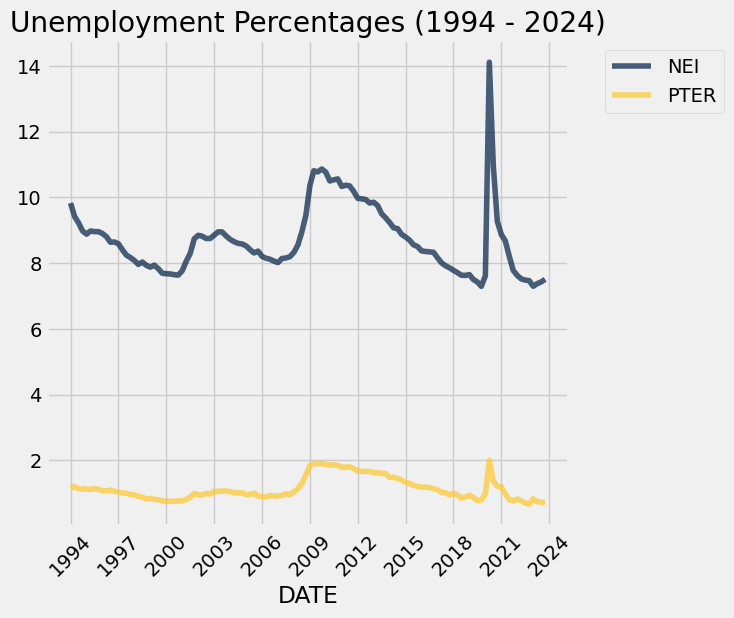

In [10]:
unemployment_separated = unemployment.drop('NEI+PTER')
unemployment_separated.plot('DATE')

# Leave the following code to improve the readability of the horizontal axis tick marks
start_date = min(unemployment.column("DATE"))
end_date = max(unemployment.column("DATE"))
years = [datetime(year, 1, 1) for year in range(start_date.year, end_date.year + 3, 3)]
plt.gca().set_xticks(years)
plt.gca().set_xticklabels([year.strftime('%Y') for year in years])
plt.xticks(rotation=45)
plt.title("Unemployment Percentages (1994 - 2024)")
plt.show()

<!-- END QUESTION -->

### Task 02 📍🔎

<!-- BEGIN QUESTION -->

As you saw early on in the course, sometimes the lines produced from data reveal a story in the data. For this task, we want you to review the graph for patterns, identify 3 major events in US history based on the graph, hypothesize how the events and the patterns in the unemployment data are related, and provide an observation bout the difference in NEI and PTER trends in relation to those events.

In your response:
1. Mention 3 events that occurred between 1994 and 2024.
2. Express how those 3 events show up in the patterns you are observing.
3. Hypothesize how those events are associated with unemployment data.
4. Relate the difference in the lines for NEI and PTER compared with the events.

_Points:_ 2

2011 Airplane Crash, 2008 Financial Crisis, and 2021 Covid are events that may have caused unemployment, as these data show spikes of unemployment rate in the graph. The fall of World Trade Center in 2011 has caused a significant decline in financial crisis, and the loss of jobs not just in New York, but also across the world, where the offices locate. The Great Recession in 2008, especially in the U.S., due to the drop in the finance, it led to lots of unemployed people. During the Covid period, people had to stay in their houses and could not move, thus loss of jobs that are needed in-person, since it was dangerous for people to flourish outside homes, as the disease can spread out as people cluster. The Non-Employment Index (NEI) has much steeper spike than the Part-Time for Economic Reasons (PTER), since the PTER (the people who need to work for part-time as in they need money), and usually these jobs are necessary for survival. Thus, the steepness of the PTER is much shallower than the NEI, as the full-time jobs are mostly affected by the financial crisis and major events that cause problems in (global) finance.

<!-- END QUESTION -->

---

## Birth Rates


The CSV file `census.csv` contains census-based population estimates for each state on both July 1, 2022 and July 1, 2023. The data was taken from [the US Census 2020-2023 national totals data set](https://www2.census.gov/programs-surveys/popest/datasets/2020-2023/state/totals/NST-EST2023-ALLDATA.csv). 

Run the following code cell to load that data into a table called `pop`.

In [11]:
pop = Table.read_table('census.csv')
pop

REGION,NAME,2022,2023,BIRTHS,DEATHS,MIGRATION,OTHER
3,Alabama,5073903,5108468,58251,59813,36128,-1
4,Alaska,733276,733406,9266,5581,-3539,-16
4,Arizona,7365684,7431344,78494,70792,57814,144
3,Arkansas,3046404,3067732,35566,36473,22202,33
4,California,39040616,38965193,414120,302704,-187389,550
4,Colorado,5841039,5877610,62498,45099,19167,5
1,Connecticut,3608706,3617176,34957,32842,6248,107
3,Delaware,1019459,1031890,10725,10897,12597,6
3,District of Columbia,670949,678972,7627,5020,5460,-44
3,Florida,22245521,22610726,223578,231181,372870,-62


Here is a brief explanation of the column labels:

* `REGION`: Census Region code
* `NAME`: State name
* `'2022'`: 7/1/2022 resident total population estimate
* `'2023'`" 7/1/2023 resident total population estimate
* `'BIRTHS'`: Births in period 7/1/2022 to 6/30/2023			
* `'DEATHS'`: Deaths in period 7/1/2022 to 6/30/2023
* `'MIGRATION'`: Net migration in period 7/1/2022 to 6/30/2023
* `'OTHER'`: Residual for period 7/1/2022 to 6/30/2023

The last four columns describe the components of the estimated change in population during this time interval. 

**Note:** For all questions below, assume that the word "states" refers to all 52 rows including Puerto Rico & the District of Columbia.

---

### Task 03 📍

Assign `us_birth_rate` to the total US annual birth rate during this time interval. The annual birth rate for a year-long period is the total number of births in that period as a proportion of the population size at the start of the time period.

**Hint:** Which year corresponds to the start of the time period?


_Points:_ 2

In [30]:
us_birth_rate = np.sum(pop.column('BIRTHS'))/np.sum(pop.column('2022'))
us_birth_rate

0.010913086179252468

In [31]:
grader.check("task_03")

task_03 results: All test cases passed!
task_03 - 1 message: ✅ You have provided a possible value.

---

### Task 04 📍

Assign `movers` to the number of states for which the **absolute value** of the **annual rate of migration** was higher than 1%. The annual rate of migration for a year-long period is the net number of migrations (in and out) as a proportion of the population size at the start of the period. The `MIGRATION` column contains estimated annual net migration counts by state.


_Points:_ 2

In [32]:
migration_rates = pop.with_column('MIGRATION RATE', np.abs(pop.column('MIGRATION')/pop.column('2022')))
movers = migration_rates.where('MIGRATION RATE', are.above(0.01)).num_rows
movers

7

In [33]:
grader.check("task_04")

task_04 results: All test cases passed!
task_04 - 1 message: ✅ You have provided a possible value.

---

### Task 05 📍

Assign `west_births` to the total number of births that occurred in region 4 (the Western US). 

**Hint:** Make sure you double check the type of the values in the region column, and appropriately filter (i.e. the types must match!).


_Points:_ 2

In [36]:
west = pop.where('REGION', are.equal_to(4))
west_births = np.sum(west.column('BIRTHS'))
west_births

840406

In [37]:
grader.check("task_05")

task_05 results: All test cases passed!
task_05 - 1 message: ✅ You have provided a possible value.

---

### Task 06 📍

Assign `less_than_west_births` to the number of states that had a total population in 2023 that was smaller than the *total number of births in region 4 (the Western US)* during this time interval.


_Points:_ 2

In [44]:
exclude_west = pop.where('REGION', are.not_equal_to(4))
west_births = exclude_west.where('BIRTHS', are.below(west_births)).num_rows
west_births

39

In [45]:
grader.check("task_06")

task_06 results: All test cases passed!
task_06 - 1 message: ✅ You have provided a possible value.

---

### Task 07 📍

In the next question, you will be creating a visualization to understand the relationship between birth and death rates for the states. The annual death rate for a year-long period in a state is the total number of deaths in that period for that state as a proportion of the population size at the start of the time period for that state.

What visualization is most appropriate to see if there is an association between birth and death rates during a given time interval among the states?

1. Line Graph
<br>
2. Scatter Plot
<br>
3. Bar Chart

Assign `visualization` below to the number corresponding to the correct visualization.


_Points:_ 2

In [56]:
visualization = 2

In [57]:
grader.check("task_07")

task_07 results: All test cases passed!
task_07 - 1 message: ✅ You have provided a possible value.

---

### Task 08 📍🔎

<!-- BEGIN QUESTION -->

In the code cell below, create a visualization that will help us determine if there is an association between birth rate and death rate during this time interval among the states. 

It may be helpful to create intermediate variables. In our template, we've introduced the names `birth_rates_2022` and `death_rates_2022` as suggestions. We will not test those names, so you do not need to use them. We will only score the visualization you produce.


_Points:_ 2

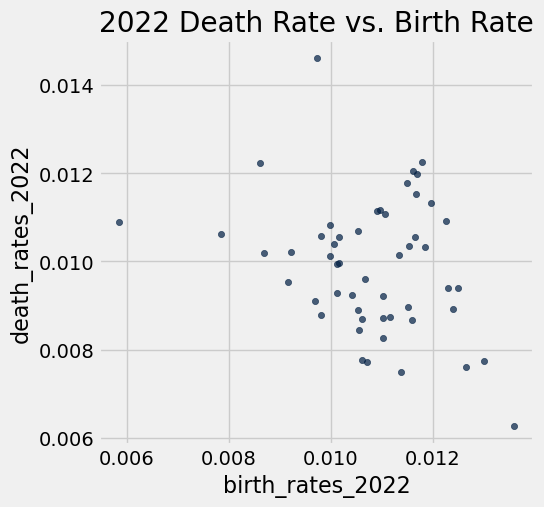

In [54]:
birth_rates_2022 = pop.column('BIRTHS')/pop.column('2022')
death_rates_2022 = pop.column('DEATHS')/pop.column('2022')
rates = Table().with_columns('birth_rates_2022', birth_rates_2022, 'death_rates_2022', death_rates_2022)
rates.scatter('birth_rates_2022','death_rates_2022')

# Leave the following code to add a title to your graph
plt.title('2022 Death Rate vs. Birth Rate')
plt.show()

<!-- END QUESTION -->

---

### Task 09 📍

`True` or `False`: There is an association between birth rate and death rate during this time interval among the states. 

Assign `assoc` to `True` or `False` in the cell below. 


_Points:_ 2

In [58]:
assoc = True

In [59]:
grader.check("task_09")

task_09 results: All test cases passed!
task_09 - 1 message: ✅ You provided a possible answer.

---

## Marginal Histograms


Consider the following scatter plot: 

<img src="scatter.png" alt="The Scatter plot" width=40%>

The axes of the plot represent values of two variables: $x$ and $y$. 

Suppose we have a table called `t` that has two columns in it:

- `x`: a column containing the x-values of the points in the scatter plot
- `y`: a column containing the y-values of the points in the scatter plot

Below, you are given three histograms &ndash; one corresponds to column `x`, one corresponds to column `y`, and one does not correspond to either column.

### Histogram A

<img src="histogram_A.png" alt="Histogram A: Symmetrical, bell-shaped histogram centered around 0" width=40%>

### Histogram B

<img src="histogram_B.png" alt="Histogram B: Symmetrical histogram with two peaks at -1 and 1 but no data around 0" width=40%>

### Histogram C

<img src="histogram_C.png" alt="Histogram C: Asymmetrical histogram with a peak around -0.5 and a right skew" width=40%>

---

### Task 10 📍

Suppose we run `t.hist('x')`. Which histogram does this code produce? Assign `histogram_column_x` to one of the following strings: `'A'`, `'B'`, or `'C'`.

_Points:_ 2

In [58]:
histogram_column_x = 'C'

In [59]:
grader.check("task_10")

task_10 results: All test cases passed!
task_10 - 1 message: ✅ You provided a possible answer.

---

### Task 11 📍

Suppose we run `t.hist('y')`. Which histogram does this code produce? `Assign histogram_column_y` to one of the following strings: `'A'`, `'B'`, or `'Neither'`.

_Points:_ 2

In [60]:
histogram_column_y = 'B'

In [61]:
grader.check("task_11")

task_11 results: All test cases passed!
task_11 - 1 message: ✅ You provided a possible answer.

---

## Uber Movement

According to the former [Uber](https://www.uber.com) Movement project page:
> Planning great cities requires great data. Uber gathers trip data in more than 10,000 cities across the world. So why not share it? Enter Uber Movement, which gives urban planners access to Uber’s aggregated data to help make informed decisions about our cities.

The Uber Movement project and data access have ended, but we still have data from Boston and Manila. Below we load tables containing 200,000 weekday Uber rides in the Manila, Philippines, and Boston, Massachusetts metropolitan areas from the Uber Movement project. The `'sourceid'` and `'dstid'` columns contain codes corresponding to start and end locations of each ride. The `'hod'` column contains codes corresponding to the hour of the day the ride took place. The ride time column contains the length of the ride in minutes.

Run the following code cell to create the table `uber` which contains the available Uber ride data for Boston and Manila.

In [62]:
boston = Table.read_table("boston.csv").with_column('city', ['Boston']*200_000)
manila = Table.read_table("manila.csv").with_column('city', ['Manila']*200_000)
uber = boston.append(manila)
uber

sourceid,dstid,hod,ride time,city
584,33,7,11.866,Boston
1013,1116,13,17.7993,Boston
884,1190,22,19.3488,Boston
211,364,1,1.7235,Boston
218,1189,7,42.5588,Boston
1048,461,7,26.4212,Boston
879,461,11,23.7743,Boston
1047,1002,17,36.3583,Boston
930,856,6,16.6407,Boston
1110,875,22,17.3533,Boston


---

### Task 12 📍🔎

<!-- BEGIN QUESTION -->

Using the `uber` table, produce an overlaid histogram that visualizes the distributions of all ride times in Boston and Manila. Use the `group='city'` argument with the [`hist` table method](https://datascience.readthedocs.io/en/master/_autosummary/datascience.tables.Table.hist.html#datascience.tables.Table.hist) to accomplish this. Additionally, use the given bins in `equal_bins` by utilizing the `bins` argument for the `hist` table method.

_Points:_ 2

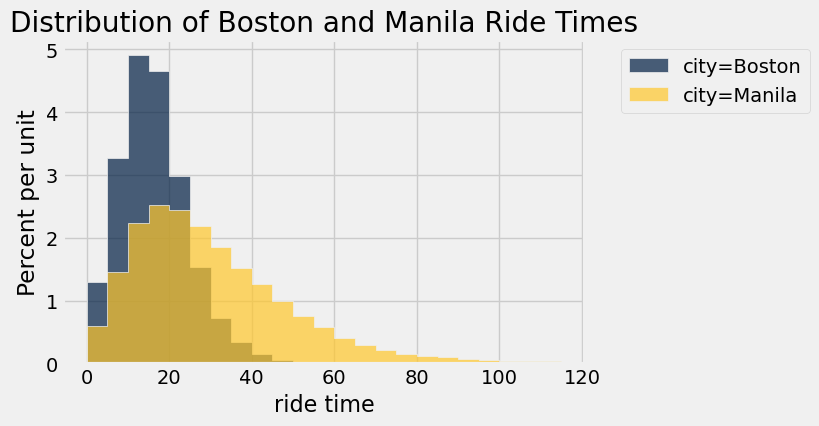

In [72]:
equal_bins = np.arange(0, 120, 5)
uber.hist('ride time', bins=equal_bins, group='city')

# Leave the following code to add a title to your histogram
plt.title('Distribution of Boston and Manila Ride Times')
plt.show()

<!-- END QUESTION -->

---

### Task 13 📍🔎

<!-- BEGIN QUESTION -->

Why do you think the distributions for Boston and Manila are different? 

For this task:
* Form a hypothesis that identifies external factors of the two cities that may be causing the difference!
* Provide at least one reference (link) to support your claim.

_Points:_ 2

The price for Manila is generally cheaper, and it is likely cheaper in Manila compared to Boston. This explains that the ride time for Uber in Manila is longer than those of Boston, even though the percentage of getting Uber rides is lower. Link: https://versus.com/en/boston-vs-manila. According to the CBS News, Manila is #18 of worst traffic, while Boston is not on the list. This means that the traffic congestion may be a factor that contributes to the ride of the Uber used, meaning that it is better to utilize Uber in a longer distance travel. In terms of Boston, since the traffic is not as bad as Manila, there are more people using the Uber in a shorter distances. (Source: https://www.cbsnews.com/pictures/worst-traffic-cities-in-the-world/2/)

<!-- END QUESTION -->

---

### Task 14 📍🔎

<!-- BEGIN QUESTION -->

From the histograms, it looks like there are more 20 to 40-minute Uber rides in Manila compared to Boston. Histograms reflect density, so be careful of interpreting the heights of the bars as counts. It is okay to compare the histograms directly because they both represent 200,000 data points. For this task, produce a bar chart showing that Manila does have more 20 to 40-minute Uber rides than Boston. 

**Note:** For this task, it doesn't matter if you include 40-minute rides in your count or not.

**Hint:** Consider using the [`group` table method](https://datascience.readthedocs.io/en/master/_autosummary/datascience.tables.Table.group.html).

_Points:_ 2

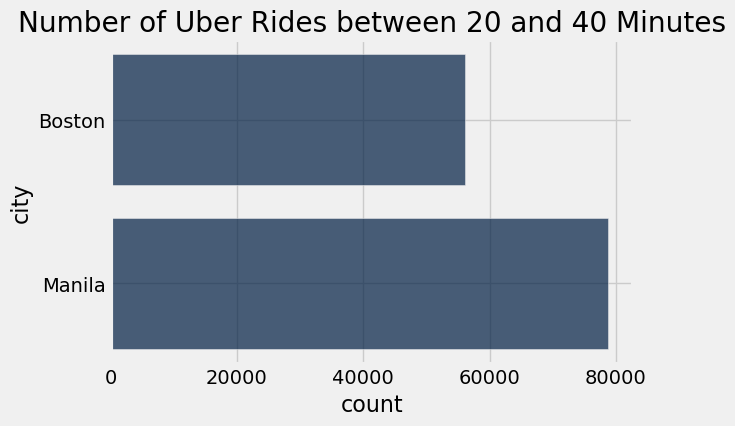

In [79]:
uber.where('ride time', are.between (20,40)).group('city').barh('city')

# Leave the following code to add a title to your histogram
plt.title('Number of Uber Rides between 20 and 40 Minutes')
plt.show()

<!-- END QUESTION -->

---

## NYC Motor Vehicle Collisions - Crashes

The data in `'nyc_crashes_2024_sample.csv'` contains information from a random sample of 1,000 police reported motor vehicle collisions in NYC during 2024. The police report ([MV104-AN](https://www.nhtsa.gov/sites/nhtsa.dot.gov/files/documents/ny_overlay_mv-104an_rev05_2004.pdf)) is required to be filled out for collisions where someone is injured or killed, or where there is at least $1000 worth of damage.

You can read more about the data at the [NYC OpenData page: Motor Vehicle Collisions - Crashes](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data).

Run the following code cell to create the table `nyc` form that CSV file.


In [64]:
nyc = Table.read_table('nyc_crashes_2024_sample.csv')
nyc

crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
2024-03-29T00:00:00.000,18:40,MANHATTAN,10022,40.7579,-73.9713,", (40.757942, -73.97133)",nan,nan,600 LEXINGTON AVENUE,0,0,0,0,0,0,0,0,Unspecified,Unspecified,nan,nan,nan,4714526,Ambulance,Sedan,nan,nan,nan
2024-08-16T00:00:00.000,2:00,BROOKLYN,11204,nan,nan,nan,NEW UTRECHT AVENUE,BAY RIDGE PARKWAY,nan,1,0,0,0,0,0,1,0,Alcohol Involvement,Unspecified,nan,nan,nan,4749561,Sedan,Sedan,nan,nan,nan
2024-02-21T00:00:00.000,14:30,nan,nan,40.7527,-73.9968,", (40.752724, -73.996796)",9 AVENUE,nan,nan,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,nan,nan,nan,4704294,Sedan,Taxi,nan,nan,nan
2024-04-28T00:00:00.000,22:29,MANHATTAN,10128,40.7802,-73.9501,", (40.7802, -73.95007)",nan,nan,1733 2 AVENUE,0,0,0,0,0,0,0,0,Unspecified,Unspecified,nan,nan,nan,4720858,Sedan,Pick-up Truck,nan,nan,nan
2024-06-26T00:00:00.000,17:40,BROOKLYN,11234,40.6314,-73.9311,", (40.631428, -73.931145)",SCHENECTADY AVENUE,KINGS HIGHWAY,nan,2,0,0,0,0,0,2,0,Unspecified,Unspecified,Unspecified,nan,nan,4736566,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,nan,nan
2024-02-04T00:00:00.000,13:45,BROOKLYN,11206,40.706,-73.9414,", (40.706028, -73.94137)",nan,nan,160 BOERUM STREET,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,nan,nan,nan,4700177,Station Wagon/Sport Utility Vehicle,Sedan,nan,nan,nan
2024-03-01T00:00:00.000,8:57,BROOKLYN,11219,40.6216,-73.9983,", (40.621616, -73.99831)",67 STREET,NEW UTRECHT AVENUE,nan,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,nan,nan,nan,4706200,Box Truck,Bus,nan,nan,nan
2024-05-28T00:00:00.000,14:24,BRONX,10458,40.8583,-73.8928,", (40.858303, -73.892784)",EAST 187 STREET,PARK AVENUE,nan,0,0,0,0,0,0,0,0,Other Vehicular,Other Vehicular,nan,nan,nan,4728300,Station Wagon/Sport Utility Vehicle,Moped,nan,nan,nan
2024-06-12T00:00:00.000,1:50,BROOKLYN,11213,40.6774,-73.9303,", (40.677414, -73.93033)",ATLANTIC AVENUE,UTICA AVENUE,nan,3,0,0,0,0,0,3,0,Alcohol Involvement,Unspecified,nan,nan,nan,4732130,Sedan,Sedan,nan,nan,nan
2024-02-08T00:00:00.000,13:55,QUEENS,11419,40.6894,-73.8087,", (40.689445, -73.808716)",VANWYCK EXPRESSWAY,106 AVENUE,nan,0,0,0,0,0,0,0,0,Unspecified,Unspecified,nan,nan,nan,4701745,Sedan,Station Wagon/Sport Utility Vehicle,nan,nan,nan


A major part of a data analyst's world load involves prepping the data for analysis. Some refer to this process as cleaning the data. In the next few tasks, you'll use what you've learned about making and applying functions to start to clean up this data.

---

It is very common for data sets to be incomplete. Notice the many `nan` values throughout the table. `nan` refers to "not a number" and is a generic placeholder for missing data. You might see this expressed in a variety of other ways such as `NaN`. For example, in the `'borough'` and `'latitude'` columns, you should see `nan` expressed in the data. A tricky thing about cleaning up the `nan` values in `nyc` is that the data type of the `nan` value depends on the data type of the data in the related column. In general, you should know the data type of a column before working with its values.

### Task 15 📍

What is the data type for the `nan` values in the `'borough'` column? Assign `borough_nan_type` to the integer 1, 2, 3, or 4 corresponding to your response option from below:

1. String
2. Integer
3. Float
4. None of the above

**Hint**: You can use the `type` function to check the data type of an item from an array.

_Points:_ 2

In [71]:
type(nyc.column('borough').item(2))

str

In [72]:
borough_nan_type = 1
borough_nan_type

1

In [67]:
grader.check("task_15")

task_15 results: All test cases passed!
task_15 - 1 message: ✅ borough_nan_type is assigned to an integer 1, 2, 3, or 4.

---

### Task 16 📍

What is the data type for the `nan` values in the `'latitude'` column? Assign `latitude_nan_type` to the integer 1, 2, 3, or 4 corresponding to your response option from below:

1. String (`str`)
2. Integer (`int`)
3. Float (`float`)
4. None of the above

**Hint**: You can use the `type` function to check the data type of an item from an array.

_Points:_ 2

In [107]:
type(nyc.column('latitude').item(1))

float

In [109]:
latitude_nan_type = 3
latitude_nan_type

3

In [94]:
grader.check("task_16")

task_16 results: All test cases passed!
task_16 - 1 message: ✅ latitude_nan_type is assigned to an integer 1, 2, 3, or 4.

---

Aside from the `nan` values, the following code shows that the `'latitude'` and `'longitude'` columns contain `0` values, which doesn't make sense because [New York City is bounded](https://en.wikipedia.org/wiki/Module:Location_map/data/USA_New_York_City) by the latitude values of 40.49 to 40.92 and the longitude values of -74.27 to -73.68. The center of the city is at (40.705, -73.975).

In [95]:
nyc.sort('latitude').show(5)

crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
2024-03-13T00:00:00.000,20:00,nan,nan,0,0,", (0.0, 0.0)",PARK AVENUE,nan,nan,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,nan,nan,nan,nan,4709757,Sedan,nan,nan,nan,nan
2024-06-18T00:00:00.000,16:15,nan,nan,0,0,", (0.0, 0.0)",nan,nan,97 EAST DRIVE,1,0,0,0,0,0,0,0,Driver Inexperience,nan,nan,nan,nan,4733857,E-Scooter,nan,nan,nan,nan
2024-06-05T00:00:00.000,9:35,nan,nan,0,0,", (0.0, 0.0)",ATLANTIC AVENUE,nan,nan,1,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,nan,nan,nan,nan,4732643,Sedan,E-Scooter,nan,nan,nan
2024-07-23T00:00:00.000,9:00,BROOKLYN,11231,0,0,", (0.0, 0.0)",nan,nan,29 TIFFANY PLACE,0,0,0,0,0,0,0,0,Unspecified,nan,nan,nan,nan,4742525,Station Wagon/Sport Utility Vehicle,nan,nan,nan,nan
2024-05-16T00:00:00.000,19:45,STATEN ISLAND,10307,40.5069,-74.2351,", (40.506874, -74.23512)",JOLINE AVENUE,GIEGERICH PLACE,nan,1,0,0,0,0,0,1,0,View Obstructed/Limited,Unspecified,nan,nan,nan,4725301,Sedan,Sedan,nan,nan,nan


One way to handle missing values is to remove the rows for which certain columns have missing values. 

We created the following function for you that determines if a latitude and longitude combination could possibly be in New York City. The function returns a `bool` value depending on whether or not the coordinates are within the NYC boundaries. You'll learn about the code in this function soon!

In [96]:
def in_nyc(lat, long):
    """
    This function checks if the latitude (float) and longitude (float) provided fall within 
    the approximate boundaries of New York City. The function returns True if the latitude is between 
    40.49 and 40.92 and the longitude is between -74.27 and -73.68. Otherwise, it returns False.

    Examples:
    >>> in_nyc(40.705, -73.975)
    True

    >>> in_nyc(27.000, -73.975)
    False
    """
    
    if 40.49 <= lat <= 40.92 and -74.27 <= long <= -73.68:
        return True
    else:
        return False

Notice how the function handles `nan` values:

In [97]:
in_nyc(np.nan, -73.975)

False

Let's use this tool to clean up the data regarding the latitude and longitude values.

### Task 17 📍

Apply the `in_nyc` function to `nyc` to create the table `nyc_clean_1` that contains only the rows in `nyc` where the latitude and longitude values are possible. In the end, `nyc_clean_1` should have the same columns as `nyc` but with fewer rows.

**Notes**: 
1. Remember from a recent lecture that you can apply a function with multiple arguments.
2. To remove the unwanted rows, try adding a column of the `bool` values to the table and using `where` to filter based on the flawed latitude and longitude values. Don't forget to remove that added column in your final table.

_Points:_ 4

In [112]:
in_nyc_bools = nyc.apply(in_nyc, 'latitude', 'longitude')
add_nyc_bools = nyc.with_column('whether_inside_nyc', in_nyc_bools)
nyc_clean_1 = add_nyc_bools.where('whether_inside_nyc', True).drop('whether_inside_nyc')
nyc_clean_1

crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
2024-03-29T00:00:00.000,18:40,MANHATTAN,10022,40.7579,-73.9713,", (40.757942, -73.97133)",nan,nan,600 LEXINGTON AVENUE,0,0,0,0,0,0,0,0,Unspecified,Unspecified,nan,nan,nan,4714526,Ambulance,Sedan,nan,nan,nan
2024-02-21T00:00:00.000,14:30,nan,nan,40.7527,-73.9968,", (40.752724, -73.996796)",9 AVENUE,nan,nan,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,nan,nan,nan,4704294,Sedan,Taxi,nan,nan,nan
2024-04-28T00:00:00.000,22:29,MANHATTAN,10128,40.7802,-73.9501,", (40.7802, -73.95007)",nan,nan,1733 2 AVENUE,0,0,0,0,0,0,0,0,Unspecified,Unspecified,nan,nan,nan,4720858,Sedan,Pick-up Truck,nan,nan,nan
2024-06-26T00:00:00.000,17:40,BROOKLYN,11234,40.6314,-73.9311,", (40.631428, -73.931145)",SCHENECTADY AVENUE,KINGS HIGHWAY,nan,2,0,0,0,0,0,2,0,Unspecified,Unspecified,Unspecified,nan,nan,4736566,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,nan,nan
2024-02-04T00:00:00.000,13:45,BROOKLYN,11206,40.706,-73.9414,", (40.706028, -73.94137)",nan,nan,160 BOERUM STREET,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,nan,nan,nan,4700177,Station Wagon/Sport Utility Vehicle,Sedan,nan,nan,nan
2024-03-01T00:00:00.000,8:57,BROOKLYN,11219,40.6216,-73.9983,", (40.621616, -73.99831)",67 STREET,NEW UTRECHT AVENUE,nan,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,nan,nan,nan,4706200,Box Truck,Bus,nan,nan,nan
2024-05-28T00:00:00.000,14:24,BRONX,10458,40.8583,-73.8928,", (40.858303, -73.892784)",EAST 187 STREET,PARK AVENUE,nan,0,0,0,0,0,0,0,0,Other Vehicular,Other Vehicular,nan,nan,nan,4728300,Station Wagon/Sport Utility Vehicle,Moped,nan,nan,nan
2024-06-12T00:00:00.000,1:50,BROOKLYN,11213,40.6774,-73.9303,", (40.677414, -73.93033)",ATLANTIC AVENUE,UTICA AVENUE,nan,3,0,0,0,0,0,3,0,Alcohol Involvement,Unspecified,nan,nan,nan,4732130,Sedan,Sedan,nan,nan,nan
2024-02-08T00:00:00.000,13:55,QUEENS,11419,40.6894,-73.8087,", (40.689445, -73.808716)",VANWYCK EXPRESSWAY,106 AVENUE,nan,0,0,0,0,0,0,0,0,Unspecified,Unspecified,nan,nan,nan,4701745,Sedan,Station Wagon/Sport Utility Vehicle,nan,nan,nan
2024-05-01T00:00:00.000,9:30,BROOKLYN,11229,40.6117,-73.9507,", (40.611732, -73.95066)",nan,nan,2300 KINGS HIGHWAY,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,nan,nan,nan,4721177,Sedan,Station Wagon/Sport Utility Vehicle,nan,nan,nan


In [113]:
grader.check("task_17")

task_17 results: All test cases passed!
task_17 - 1 message: ✅ nyc_clean_1 is a table with the same columns as nyc.

---

### PARKWAY vs. PKWY

A classic data cleaning problem involves handling multiple representations of the same thing. For example, run the following code to see that Grand Central Parkway is expressed 2 times as `'GRAND CENTRAL PARKWAY'` and 9 times as 'GRAND CENTRAL PKWY' in the `'on_street_name'` column. For reference, this is the street on which the collision occurred according to the [NYC OpenData reference](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data).
 

In [114]:
(nyc_clean_1
 .where('on_street_name', are.containing('GRAND CENTRAL'))
 .group('on_street_name')
 .select('on_street_name'))

on_street_name
GRAND CENTRAL PARKWAY
GRAND CENTRAL PKWY


In this case, it takes a little subject matter knowledge to know that `'PKWY'` is just an abbreviation for `'PARKWAY'`. Now, you'll work on cleaning up this issue in the data, because we should be acknowledging there are a total of 12 incidents at this on-street.

### Task 18 📍

Write a function called `update_PKWY` that takes in a string as input, replaces any instance (sub-string) of `'PKWY'` with `'PARKWAY'`, and returns the updated string.

**Notes:**
* Remember that `replace` function that you've used before in this class when working with strings? That could be helpful here!
* As a test case, running `update_PKWY('GRAND CENTRAL PKWY')` should return `'GRAND CENTRAL PARKWAY'`.

_Points:_ 2

In [117]:
def update_PKWY(a_string):
    '''To replace 'PKWY' with 'PARKWAY'''
    return a_string.replace('PKWY','PARKWAY')

update_PKWY ('GRAND CENTRAL PKWY')


'GRAND CENTRAL PARKWAY'

In [118]:
grader.check("task_18")

task_18 results: All test cases passed!
task_18 - 1 message: ✅ update_PKWY is callable.
task_18 - 2 message: ✅ update_PKWY works correctly with GRAND CENTRAL PKWY.

---

### Task 19 📍

Using `update_PWKY`, replace every instance of `PWKY` in the `'on_street_name'`, `'off_street_name'`, and `'cross_street_name`' columns of `nyc_clean_1` with `'PARKWAY'`. Save the updated version of `nyc_clean_1` as `nyc_cleanish`.

**Note**: We recommend using the `apply` table method. If you have any coding experience, you might be tempted use a loop of some kind. We don't recommend this because loops are generally inefficient for working with large data sets. If you don't know what a loop is, don't worry! You'll learn about those in this class.

_Points:_ 4

In [121]:
update_on_street_name = nyc_clean_1.apply(update_PKWY, ('on_street_name'))
update_off_street_name = nyc_clean_1.apply(update_PKWY, ('off_street_name'))
update_cross_street_name = nyc_clean_1.apply(update_PKWY, ('cross_street_name'))
nyc_cleanish = nyc_clean_1.with_columns('on_street_name', update_on_street_name, 'off_street_name', update_off_street_name, 'cross_street_name', update_cross_street_name)

nyc_cleanish 

crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
2024-03-29T00:00:00.000,18:40,MANHATTAN,10022,40.7579,-73.9713,", (40.757942, -73.97133)",nan,nan,600 LEXINGTON AVENUE,0,0,0,0,0,0,0,0,Unspecified,Unspecified,nan,nan,nan,4714526,Ambulance,Sedan,nan,nan,nan
2024-02-21T00:00:00.000,14:30,nan,nan,40.7527,-73.9968,", (40.752724, -73.996796)",9 AVENUE,nan,nan,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,nan,nan,nan,4704294,Sedan,Taxi,nan,nan,nan
2024-04-28T00:00:00.000,22:29,MANHATTAN,10128,40.7802,-73.9501,", (40.7802, -73.95007)",nan,nan,1733 2 AVENUE,0,0,0,0,0,0,0,0,Unspecified,Unspecified,nan,nan,nan,4720858,Sedan,Pick-up Truck,nan,nan,nan
2024-06-26T00:00:00.000,17:40,BROOKLYN,11234,40.6314,-73.9311,", (40.631428, -73.931145)",SCHENECTADY AVENUE,KINGS HIGHWAY,nan,2,0,0,0,0,0,2,0,Unspecified,Unspecified,Unspecified,nan,nan,4736566,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,nan,nan
2024-02-04T00:00:00.000,13:45,BROOKLYN,11206,40.706,-73.9414,", (40.706028, -73.94137)",nan,nan,160 BOERUM STREET,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,nan,nan,nan,4700177,Station Wagon/Sport Utility Vehicle,Sedan,nan,nan,nan
2024-03-01T00:00:00.000,8:57,BROOKLYN,11219,40.6216,-73.9983,", (40.621616, -73.99831)",67 STREET,NEW UTRECHT AVENUE,nan,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,nan,nan,nan,4706200,Box Truck,Bus,nan,nan,nan
2024-05-28T00:00:00.000,14:24,BRONX,10458,40.8583,-73.8928,", (40.858303, -73.892784)",EAST 187 STREET,PARK AVENUE,nan,0,0,0,0,0,0,0,0,Other Vehicular,Other Vehicular,nan,nan,nan,4728300,Station Wagon/Sport Utility Vehicle,Moped,nan,nan,nan
2024-06-12T00:00:00.000,1:50,BROOKLYN,11213,40.6774,-73.9303,", (40.677414, -73.93033)",ATLANTIC AVENUE,UTICA AVENUE,nan,3,0,0,0,0,0,3,0,Alcohol Involvement,Unspecified,nan,nan,nan,4732130,Sedan,Sedan,nan,nan,nan
2024-02-08T00:00:00.000,13:55,QUEENS,11419,40.6894,-73.8087,", (40.689445, -73.808716)",VANWYCK EXPRESSWAY,106 AVENUE,nan,0,0,0,0,0,0,0,0,Unspecified,Unspecified,nan,nan,nan,4701745,Sedan,Station Wagon/Sport Utility Vehicle,nan,nan,nan
2024-05-01T00:00:00.000,9:30,BROOKLYN,11229,40.6117,-73.9507,", (40.611732, -73.95066)",nan,nan,2300 KINGS HIGHWAY,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,nan,nan,nan,4721177,Sedan,Station Wagon/Sport Utility Vehicle,nan,nan,nan


In [122]:
grader.check("task_19")

task_19 results: All test cases passed!
task_19 - 1 message: ✅ nyc_cleanish is a Table with the same columns as nyc.
task_19 - 2 message: ✅ 'GRAND CENTRAL PKWY' is not in the on_street_name column of nyc_cleanish.

---

There is still a lot to clean up in this data set and a lot of ways we could fill in missing information. For example, it turns out that the entire route of the [Grand Central Parkway]((https://en.wikipedia.org/wiki/Grand_Central_Parkway)) is contained within the borough of Queens. This means that we can fill in some of the missing `'borough'` values using this observation. However, that is enough for this assignment.

---

## A Map of Crashes by Borough

To wrap up, here is a map of the crashes by borough using the latitude and longitude values you helped clean up! We just dropped the rows in the table with missing borough information. there is nothing you need to do with this expect preview some upcoming content in the code.

In [123]:
nyc_cleanish = nyc_cleanish.where(nyc_cleanish.column('borough') != 'nan')

colors = (nyc_cleanish
          .group('borough')
          .drop('count')
          .with_column('color', 
                       make_array('blue', 'red', 'green', 'orange', 'purple')))

nyc_map = (nyc_cleanish
           .join('borough', colors)
           .select('latitude', 'longitude', 'borough', 'color')
           .relabeled('latitude', 'lat')
           .relabeled('longitude', 'long')
           .relabeled('borough', 'labels'))

Marker.map_table(nyc_map)

---

## Submit Your Assignment to Canvas

Follow these steps to submit your homework assignment:

1. **Review the Rubric:** View the rubric on the associated Canvas Assignment page to understand the scoring criteria.
2. **Run the Auto-Grader:** Ensure you have executed the code cell containing the command `grader.check_all()` to run all tests for auto-graded tasks marked with 📍. This command will execute all auto-grader tests sequentially.
3. **Complete Manually Graded Tasks:** Verify that you have responded to all the manually graded tasks marked with 📍🔎.
4. **Save Your Work:** In the notebook's Toolbar, go to `File -> Save Notebook` to save your work and create a checkpoint.
5. **Download the Notebook:** In the notebook's Toolbar, go to `File -> Download IPYNB` to download the notebook (`.ipynb`) file.
6. **Upload to Canvas:** On the Canvas Assignment page, click "Start Assignment" or "New Attempt" to upload the downloaded `.ipynb` file.

---

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [124]:
grader.check_all()

task_03 results: All test cases passed!
task_03 - 1 message: ✅ You have provided a possible value.

task_04 results: All test cases passed!
task_04 - 1 message: ✅ You have provided a possible value.

task_05 results:
    task_05 - 1 message: ❌ We are looking for a number between 500000 and 1000000.

    task_05 - 1 result:
        ❌ Test case failed
        Trying:
            500000.0 < west_births < 1000000.0
        Expecting:
            True
        **********************************************************************
        Line 1, in task_05 0
        Failed example:
            500000.0 < west_births < 1000000.0
        Expected:
            True
        Got:
            False

task_06 results: All test cases passed!
task_06 - 1 message: ✅ You have provided a possible value.

task_07 results: All test cases passed!
task_07 - 1 message: ✅ You have provided a possible value.

task_09 results: All test cases passed!
task_09 - 1 message: ✅ You provided a possible answer.

task_10